In [38]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [2]:
f = open('pvalues.savepkl','rb')
zstats = pickle.load(f)
pvalues = pickle.load(f)
f.close()

In [3]:
len(pvalues)

2847

In [4]:
def prune_dictionary(alpha, zstats, pvalues):
    keys_to_remove = []
    for key, val in pvalues.items():
        if pvalues[key] > alpha or zstats[key] > 0 or key == '':  # drop z>0 to keep more deaths in 2009 
            keys_to_remove.append(key)
    new_zstats = zstats.copy()
    new_pvalues = pvalues.copy()
    for key in keys_to_remove:
        del new_zstats[key]
        del new_pvalues[key]
    return new_zstats, new_pvalues

In [5]:
z, p = prune_dictionary(.00001/2846, zstats, pvalues)

In [6]:
len(z)

104

In [7]:
def prune_away_sigs(alpha, zstats, pvalues):
    keys_to_remove = []
    for key, val in pvalues.items():
        if pvalues[key] < alpha or key == '':  # drop z>0 to keep more deaths in 2009 
            keys_to_remove.append(key)
    new_zstats = zstats.copy()
    new_pvalues = pvalues.copy()
    for key in keys_to_remove:
        del new_zstats[key]
        del new_pvalues[key]
    return new_zstats, new_pvalues

In [8]:
z_insig, p_insig = prune_away_sigs(.00001/2846, zstats, pvalues)

In [9]:
len(z_insig)

2604

Rank by greatest Cohen's h.

In [10]:
f = open("cohens_h.savepkl", "rb")
cohens_h = pickle.load(f)
f.close()

In [11]:
def prune_by_dict(dict_w_keys,dict_w_values):
    new_dict = {key: dict_w_values[key] for key in dict_w_keys.keys()}
    return new_dict    

In [12]:
h = prune_by_dict(p, cohens_h)

In [13]:
len(h)

104

In [14]:
dh = pd.Series(h).sort_values(ascending=False)

In [15]:
dh.head(10)

J440    0.019504
N039    0.007223
J441    0.005746
X45     0.004851
R628    0.004641
F179    0.004545
J960    0.004000
T519    0.003984
T510    0.002898
R53     0.002732
dtype: float64

In [16]:
dh.mean()

0.001439559728666582

In [17]:
h_insig = prune_by_dict(p_insig, cohens_h)

In [18]:
len(h_insig)

2604

In [19]:
dh_insig = pd.Series(h_insig).sort_values(ascending=False)

In [20]:
dh_insig.head()

I201    0.000493
F319    0.000480
K701    0.000479
I340    0.000478
J101    0.000477
dtype: float64

In [21]:
pvalues['Y24']

0.9995558706656231

In [22]:
f = open("../etl/k6.savepkl", "rb")
k6 = pickle.load(f)
f.close()
f = open("../etl/k9.savepkl", "rb")
k9 = pickle.load(f)
f.close()

In [23]:
k6prune = prune_by_dict(p, k6)
k9prune = prune_by_dict(p, k9)

In [24]:
len(k6prune)

104

In [25]:
len(k9prune)

104

In [26]:
dk = pd.DataFrame({'k6': k6prune, 'k9':k9prune, 'cohen': dh}).sort_values('cohen', ascending=False)

In [34]:
dk.head(10)

,k6,k9,cohen
J440,326,35765,0.019504
N039,6183,20445,0.007223
J441,196,4163,0.005746
X45,2222,8151,0.004851
R628,46566,67312,0.004641
F179,164878,203871,0.004545
J960,20814,32876,0.004000
T519,1141,4781,0.003984
T510,2049,5081,0.002898
R53,14483,21302,0.002732


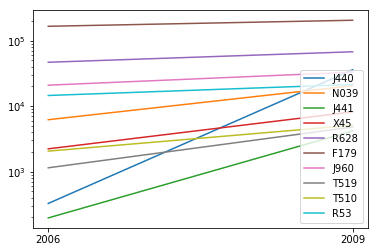

In [57]:
plt.plot([2006, 2009],[dk.head(10)['k6'], dk.head(10)['k9']])
plt.yscale('log')
plt.xticks([2006, 2009])
plt.legend(dk.head(10).index, loc='lower right')